# Lab 4: Feature Points

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

imagesDir = 'images' # Change this, according to your images' directory path

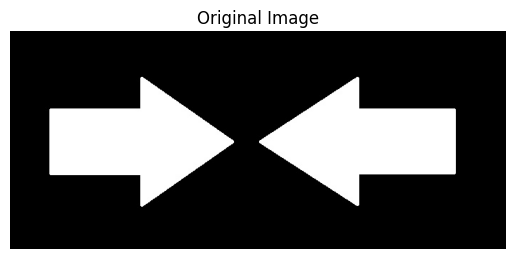

In [2]:
filename = 'corners_01.jpg'
img = cv2.imread(os.path.join(imagesDir, filename))
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

og_img = img.copy() # let's copy the image to be able to use it later without having to read it again

### 1. Corner Detection

[Harris Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345)

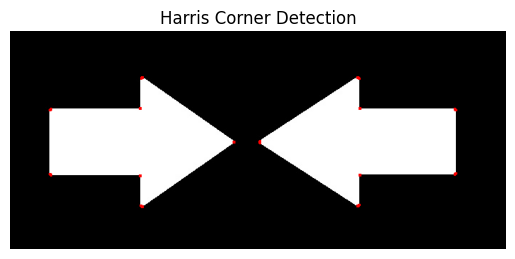

In [24]:
img = cv2.imread(os.path.join(imagesDir, filename))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

neighbourhood = 2
aperture = 3
free_param = 0.04
dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
thr = 0.01

img[dst > thr*dst.max()] = [0,0,255]

# convert to RGB for plotting with matplotlib
out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(out)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()

[Shi-Tomasi Corner Detector](https://docs.opencv.org/4.x/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_2412\1567439729.py:5: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


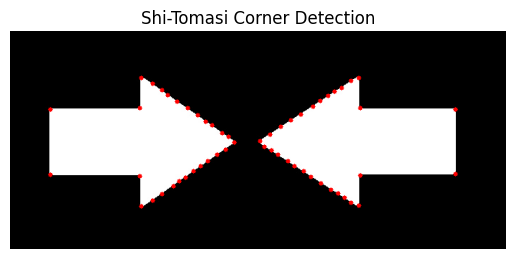

In [4]:
max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)

img2 = og_img.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2, (x,y), 3, 255, -1)
    
plt.imshow(img2)
plt.title('Shi-Tomasi Corner Detection')
plt.axis('off')
plt.show()

[FAST Corner Detector](https://docs.opencv.org/4.x/df/d74/classcv_1_1FastFeatureDetector.html)

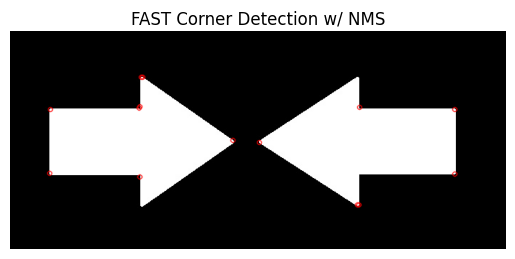

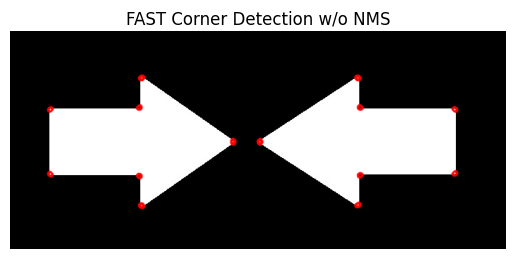

In [32]:
# Initiate FAST object with default values
fast = cv2.FastFeatureDetector_create()

# find and draw the keypoints
kp = fast.detect(og_img, None)
img3 = cv2.drawKeypoints(og_img, kp, None, color=(255,0,0))

plt.imshow(img3)
plt.title('FAST Corner Detection w/ NMS')
plt.axis('off')
plt.show()

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(og_img, None)
img4 = cv2.drawKeypoints(og_img, kp, None, color=(255,0,0))

plt.imshow(img4)
plt.title('FAST Corner Detection w/o NMS')
plt.axis('off')
plt.show()

Exercise 1.1: Compare the results obtained with the different corner detectors. Try also different parameters of Harris corner detector and analyse the impact on the results.

Exercise 1.2: Resize the images, downsizing them to 1/4 of the original size and reapply all the corner detectors. Compare the results with each other and with those that you have obtained previously

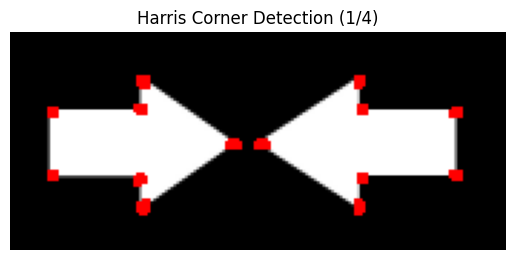

C:\Users\Utilizador\AppData\Local\Temp\ipykernel_2412\2796737627.py:46: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


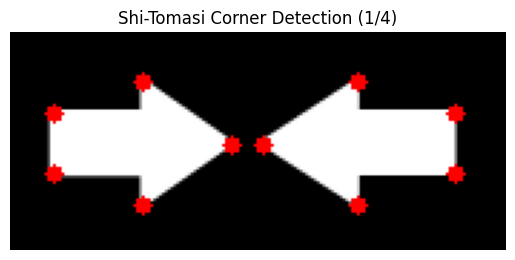

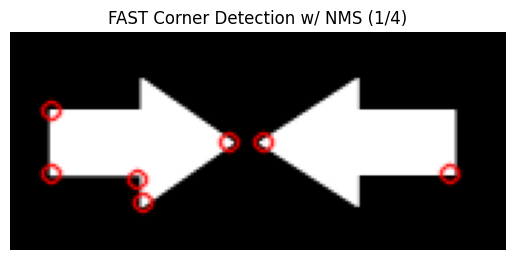

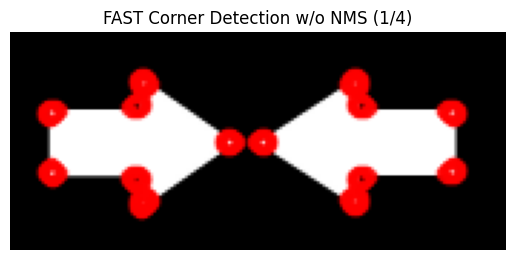

In [34]:
img = cv2.imread(os.path.join(imagesDir, filename))
scale_factor = 0.25

width = int(img.shape[1] * scale_factor)
height = int(img.shape[0] * scale_factor)
dim = (width, height)

# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)


# Harris

img = resized.copy()

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)

neighbourhood = 2
aperture = 3
free_param = 0.04
dst = cv2.cornerHarris(gray, neighbourhood, aperture, free_param)

# result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
thr = 0.01

img[dst > thr*dst.max()] = [0,0,255]

# convert to RGB for plotting with matplotlib
out = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(out)
plt.title('Harris Corner Detection (1/4)')
plt.axis('off')
plt.show()

# Shi-Tomasi

max_corners = 200
quality = 0.01
mindist = 10
corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, mindist, blockSize=neighbourhood, k=free_param)
corners = np.int0(corners)

img2 = resized.copy()
for i in corners:
    x,y = i.ravel()
    cv2.circle(img2, (x,y), 3, 255, -1)
    
plt.imshow(img2)
plt.title('Shi-Tomasi Corner Detection (1/4)')
plt.axis('off')
plt.show()

# FAST

fast = cv2.FastFeatureDetector_create()

kp = fast.detect(resized, None)
img3 = cv2.drawKeypoints(resized, kp, None, color=(255,0,0))

plt.imshow(img3)
plt.title('FAST Corner Detection w/ NMS (1/4)')
plt.axis('off')
plt.show()

# Disable NMS
fast.setNonmaxSuppression(0)
kp = fast.detect(resized, None)
img4 = cv2.drawKeypoints(resized, kp, None, color=(255,0,0))

plt.imshow(img4)
plt.title('FAST Corner Detection w/o NMS (1/4)')
plt.axis('off')
plt.show()



### 2. Blob Detection

[SIFT Blob Detector](https://docs.opencv.org/4.x/d7/d60/classcv_1_1SIFT.html)

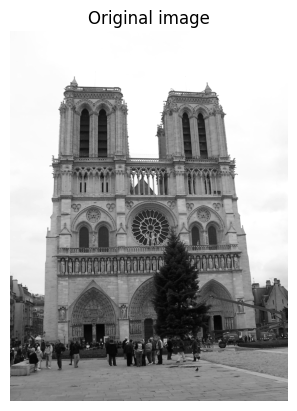

In [35]:
new_img = cv2.imread(os.path.join(imagesDir, 'match_NotreDame_1.jpg'))
gray = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Original image')
plt.axis('off')
plt.show()

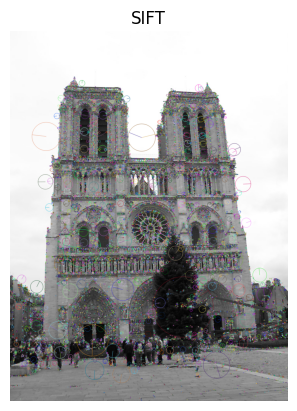

In [36]:
# Initiate SIFT detector
sift = cv2.SIFT_create()

# find the keypoints
kp = sift.detect(gray,None)

# draw the keypoints (with size and orientation)
sift_img = cv2.drawKeypoints(gray, kp, new_img, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(sift_img)
plt.title('SIFT')
plt.axis('off')
plt.show()

[Orb Blob Detector](https://docs.opencv.org/4.x/db/d95/classcv_1_1ORB.html)

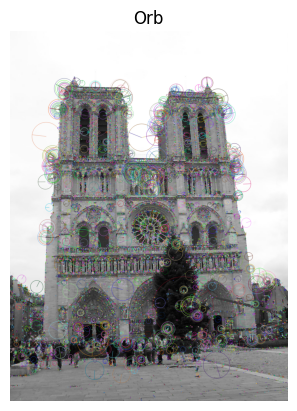

In [37]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints with ORB
kp = orb.detect(new_img, None)

# compute the descriptors with ORB
kp, des = orb.compute(new_img, kp)

# draw only keypoints location, not size and orientation
orb_img = cv2.drawKeypoints(new_img, kp, None, (-1, -1, -1), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(orb_img)
plt.title('Orb')
plt.axis('off')
plt.show()

Exercise 2.1: Compare the results obtained with the different blob detectors.

### 3. Matching

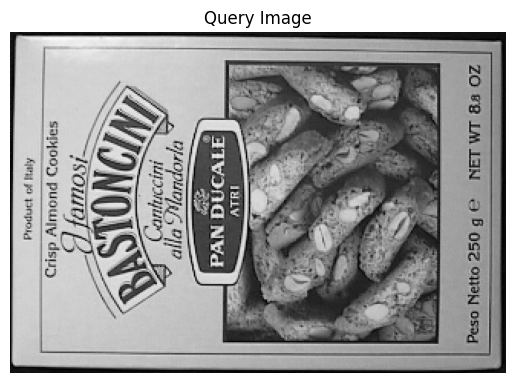

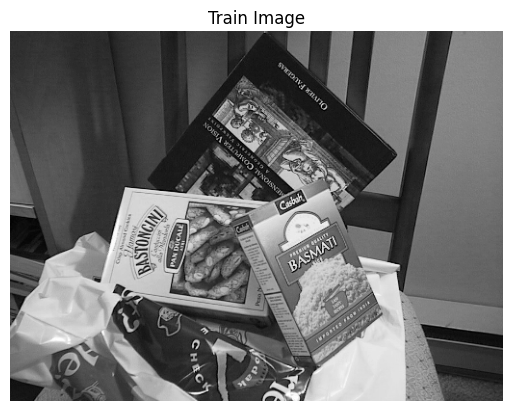

In [18]:
query = cv2.imread(os.path.join(imagesDir, 'match_box01a_1.png'), cv2.IMREAD_GRAYSCALE) # queryImage
train = cv2.imread(os.path.join(imagesDir, 'match_box01a_2.png'), cv2.IMREAD_GRAYSCALE) # trainImage

plt.imshow(query, cmap='gray')
plt.title('Query Image')
plt.axis('off')
plt.show()

plt.imshow(train, cmap='gray')
plt.title('Train Image')
plt.axis('off')
plt.show()

plt.show()

In [36]:
# Initiate SIFT detector
det = cv2.SIFT_create()

# ORB detector
#det = cv2.ORB_create()


# find the keypoints and descriptors with ORB
kp1, des1 = det.detectAndCompute(query, None)
kp2, des2 = det.detectAndCompute(train, None)

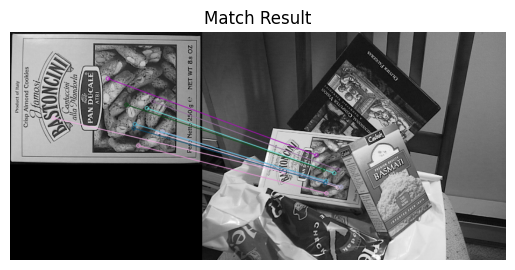

In [37]:
# create a Brute Force Matcher object
bf = cv2.BFMatcher()

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()

Exercise 3.1: Try different sets of images, keypoint detectors, matchers and visualization of the matches:
* SIFT or ORB for keypoint detection;
* Brute Force or FLANN for matching, with the alternatives match() or KnnMatch(); choose an appropriate distance measure;
* drawMatches() (with match()) or drawMatchesKnn() (with KnnMatch()) for displaying the results.

(more information: https://docs.opencv.org/4.x/dc/dc3/tutorial_py_matcher.html)

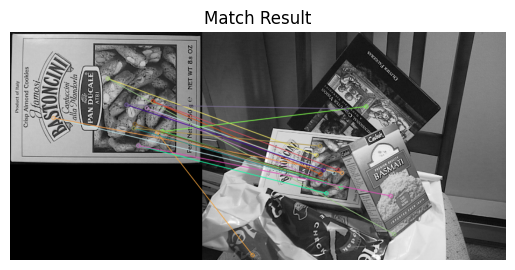

In [38]:

# create a FLANN Matcher object

matcher = cv2.FlannBasedMatcher()

# Match descriptors.
matches = matcher.knnMatch(des1,des2,k=2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

# Draw first 10 matches.
match_output = cv2.drawMatchesKnn(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(match_output)
plt.title('Match Result')
plt.axis('off')
plt.show()